In [1]:
import pandas as pd 
import numpy as np
import torch 
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('./advertising.csv')

In [3]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
features=np.array(data.iloc[:,0:3])
features=torch.tensor(features,dtype=torch.float)
labels=np.array(data.iloc[:,3])
labels=torch.tensor(labels,dtype=torch.float)

In [5]:
dataset=torch.utils.data.TensorDataset(features,labels)

In [6]:
dataloader=torch.utils.data.DataLoader(dataset,batch_size=4,shuffle=True)

In [7]:
class Linear_Net(nn.Module):
    def __init__(self,n_features):
        super(Linear_Net,self).__init__()
        self.linear=nn.Linear(n_features,1)
    def forward(self,x):
        x=self.linear(x)
        return x

In [8]:
net=Linear_Net(3)
print(net)

Linear_Net(
  (linear): Linear(in_features=3, out_features=1, bias=True)
)


In [9]:
torch.nn.init.normal_(net.linear.weight,mean=0,std=0.001)
torch.nn.init.constant_(net.linear.bias,val=0)

Parameter containing:
tensor([0.], requires_grad=True)

In [10]:
loss=nn.MSELoss()

In [11]:
optimizer=optim.Adam(net.parameters(),lr=0.01)

Epoch:1,Loss:7.31
Epoch:2,Loss:1.72
Epoch:3,Loss:1.56
Epoch:4,Loss:1.46
Epoch:5,Loss:1.31
Epoch:6,Loss:1.51
Epoch:7,Loss:1.39
Epoch:8,Loss:1.42
Epoch:9,Loss:1.17
Epoch:10,Loss:1.24
Epoch:11,Loss:1.19
Epoch:12,Loss:1.22
Epoch:13,Loss:1.21
Epoch:14,Loss:1.16
Epoch:15,Loss:1.08
Epoch:16,Loss:1.03
Epoch:17,Loss:1.17
Epoch:18,Loss:1.07
Epoch:19,Loss:1.01
Epoch:20,Loss:1.04
Epoch:21,Loss:1.05
Epoch:22,Loss:1.02
Epoch:23,Loss:0.96
Epoch:24,Loss:0.95
Epoch:25,Loss:1.02
Epoch:26,Loss:0.86
Epoch:27,Loss:0.95
Epoch:28,Loss:0.94
Epoch:29,Loss:1.11
Epoch:30,Loss:0.94
Epoch:31,Loss:1.03
Epoch:32,Loss:1.01
Epoch:33,Loss:0.88
Epoch:34,Loss:1.01
Epoch:35,Loss:0.85
Epoch:36,Loss:0.89
Epoch:37,Loss:0.97
Epoch:38,Loss:0.87
Epoch:39,Loss:0.88
Epoch:40,Loss:0.89
Epoch:41,Loss:1.01
Epoch:42,Loss:0.86
Epoch:43,Loss:0.80
Epoch:44,Loss:0.79
Epoch:45,Loss:0.84
Epoch:46,Loss:1.00
Epoch:47,Loss:1.18
Epoch:48,Loss:0.98
Epoch:49,Loss:0.97
Epoch:50,Loss:1.13


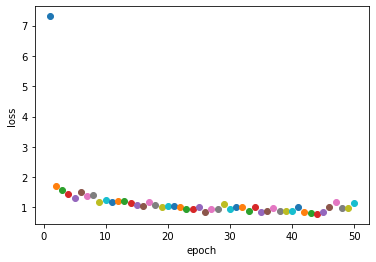

In [12]:
epochs=50
for epoch in range(1,epochs+1):
    #train_ls=[]
    loss_sum=0
    for x,y in dataloader:
        output=net(x)
        l=loss(y.view(-1,1),output)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
        #train_ls.append(l.item()) 
        loss_sum+=l
    print('Epoch:{},Loss:{:.2f}'.format(epoch,loss_sum/labels.shape[0]))
    plt.scatter(epoch,loss_sum.item()/labels.shape[0])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [13]:
print(net.linear.weight,net.linear.bias)

Parameter containing:
tensor([[0.0582, 0.1268, 0.0103]], requires_grad=True) Parameter containing:
tensor([4.1818], requires_grad=True)
